In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


emmernet_test_set_locscale_targets_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_performance_test_set_using_locscale_map_target/emmernet_test_set_hybrid"
emmernet_test_set_modelmap_targets_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target/emmernet_test_set_hybrid_model_map_target"
hybrid_locscale_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/hybrid_locscale_maps"
unsharpened_map_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/unsharpened_maps"
confidence_masks_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks"
atomic_masks_folder = "/home/abharadwaj1/dev/data/atomic_model_mask"

input_files = {}
for emdb_pdb in os.listdir(emmernet_test_set_locscale_targets_folder):
    emdb_pdb_folder_locscale_target = os.path.join(emmernet_test_set_locscale_targets_folder, emdb_pdb)
    emdb_pdb_folder_modelmap_target = os.path.join(emmernet_test_set_modelmap_targets_folder, emdb_pdb)
    if not os.path.isdir(emdb_pdb_folder_locscale_target) or not os.path.isdir(emdb_pdb_folder_modelmap_target):
        print(f'Not a folder: {emdb_pdb_folder_locscale_target} or {emdb_pdb_folder_modelmap_target}')
        continue

    emdb, pdb = emdb_pdb.split('_')

    emmernet_output_map_locscale_target = os.path.join(emdb_pdb_folder_locscale_target, f'emd_{emdb}_emmernet_output.mrc')
    emmemrnet_output_map_modelmap_target = os.path.join(emdb_pdb_folder_modelmap_target, f'emd_{emdb}_emmernet_output.mrc')
    
    if not os.path.exists(emmernet_output_map_locscale_target) or not os.path.exists(emmemrnet_output_map_modelmap_target):
        print(f'Emmernet output map does not exist: {emmernet_output_map_locscale_target} or {emmemrnet_output_map_modelmap_target}')
        continue

    unsharpened_map = os.path.join(emdb_pdb_folder_locscale_target, f'EMD_{int(emdb)}_unsharpened_fullmap.mrc')
    target_map = os.path.join(hybrid_locscale_folder,f'emd_{emdb}_hybrid_locscale_C.mrc')
    confidence_mask_path = os.path.join(atomic_masks_folder, f'atomic_model_mask_{emdb_pdb}.mrc')

    if not os.path.exists(target_map) or not os.path.exists(unsharpened_map) or not os.path.exists(confidence_mask_path):
        hybrid_map_exists = os.path.exists(target_map)
        unsharpened_map_exists = os.path.exists(unsharpened_map)
        confidence_mask_exists = os.path.exists(confidence_mask_path)
        if not hybrid_map_exists:
            print(f'Hybrid map does not exist: {target_map}')
        if not unsharpened_map_exists:
            print(f'Unsharpened map does not exist: {unsharpened_map}')
        if not confidence_mask_exists:
            print(f'Confidence mask does not exist: {confidence_mask_path}')
        continue

    input_files[emdb_pdb] = {
        'unsharpened_map': unsharpened_map,
        'target_map': target_map,
        'emmernet_output_map_locscale_target': emmernet_output_map_locscale_target,
        'emmernet_output_map_modelmap_target': emmemrnet_output_map_modelmap_target,
        'confidence_mask_path': confidence_mask_path
    }


Hybrid map does not exist: /home/abharadwaj1/papers/elife_paper/figure_information/data/hybrid_locscale_maps/emd_0560_hybrid_locscale_C.mrc
Confidence mask does not exist: /home/abharadwaj1/dev/data/atomic_model_mask/atomic_model_mask_3545_5mqf.mrc
Hybrid map does not exist: /home/abharadwaj1/papers/elife_paper/figure_information/data/hybrid_locscale_maps/emd_4141_hybrid_locscale_C.mrc
Not a folder: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_performance_test_set_using_locscale_map_target/emmernet_test_set_hybrid/4531_6qdw or /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target/emmernet_test_set_hybrid_model_map_target/4531_6qdw
Not a folder: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_performance_test_set_using_locscale_map_target/emmernet_test_set_hybrid/nohup.out or /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target

In [16]:
from locscale.include.emmer.ndimage.fsc_util import calculate_phase_correlation_maps 
from tqdm import tqdm
phase_correlations_locscale_target = {}
phase_correlations_modelmap_target = {}
phase_difference_locscale_target = {}
phase_difference_modelmap_target = {}
for emdb_pdb in tqdm(input_files): 
    unsharpened_map = input_files[emdb_pdb]['unsharpened_map']
    emmernet_output_map_locscale_target = input_files[emdb_pdb]['emmernet_output_map_locscale_target']
    emmernet_output_map_modelmap_target = input_files[emdb_pdb]['emmernet_output_map_modelmap_target']
    
    phase_correlation_modelmap, phase_difference_modelmap = calculate_phase_correlation_maps(unsharpened_map, emmernet_output_map_modelmap_target, return_phase_difference=True)
    phase_correlation_locscale, phase_difference_locscale = calculate_phase_correlation_maps(unsharpened_map, emmernet_output_map_locscale_target, return_phase_difference=True)
    
    phase_correlations_locscale_target[emdb_pdb] = phase_correlation_locscale
    phase_correlations_modelmap_target[emdb_pdb] = phase_correlation_modelmap
    phase_difference_locscale_target[emdb_pdb] = phase_difference_locscale[1]
    phase_difference_modelmap_target[emdb_pdb] = phase_difference_modelmap[1]


100%|██████████| 10/10 [05:33<00:00, 33.36s/it]


In [17]:
# plot the distribution of phase errors at different resolutions
from locscale.include.emmer.ndimage.profile_tools import frequency_array, amplitude_from_resolution
from locscale.include.emmer.ndimage.map_utils import load_map 

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

phase_corr_at_10A = {}
phase_corr_at_fsc = {}
phase_corr_at_nyquist = {}

for emdb_pdb in input_files:
    emdb, pdb = emdb_pdb.split('_')
    _, apix = load_map(input_files[emdb_pdb]['unsharpened_map'])
    
    phase_correlation_locscale = phase_correlations_locscale_target[emdb_pdb]
    phase_correlation_modelmap = phase_correlations_modelmap_target[emdb_pdb]
    
    freq = frequency_array(phase_correlation_locscale, apix)    
    
    phase_corr_locscale_10A = amplitude_from_resolution(freq, phase_correlation_locscale, probe_resolution=10)
    phase_corr_modelmap_10A = amplitude_from_resolution(freq, phase_correlation_modelmap,  probe_resolution=10)
    
    phase_corr_locscale_fsc = amplitude_from_resolution(freq, phase_correlation_locscale, probe_resolution=res_dict[emdb])
    phase_corr_modelmap_fsc = amplitude_from_resolution(freq, phase_correlation_modelmap, probe_resolution=res_dict[emdb])
    
    phase_corr_locscale_nyquist = phase_correlation_locscale[-1]
    phase_corr_modelmap_nyquist = phase_correlation_modelmap[-1]
    
    phase_corr_at_10A[emdb_pdb] = (phase_corr_locscale_10A, phase_corr_modelmap_10A)
    phase_corr_at_fsc[emdb_pdb] = (phase_corr_locscale_fsc, phase_corr_modelmap_fsc)
    phase_corr_at_nyquist[emdb_pdb] = (phase_corr_locscale_nyquist, phase_corr_modelmap_nyquist)

/home/abharadwaj1/dev/locscale/locscale/include/emmer/ndimage/profile_tools.py:259: RuntimeWarning: divide by zero encountered in log
  ydata = np.log(amplitudes)
/home/abharadwaj1/dev/locscale/locscale/include/emmer/ndimage/profile_tools.py:259: RuntimeWarning: invalid value encountered in log
  ydata = np.log(amplitudes)


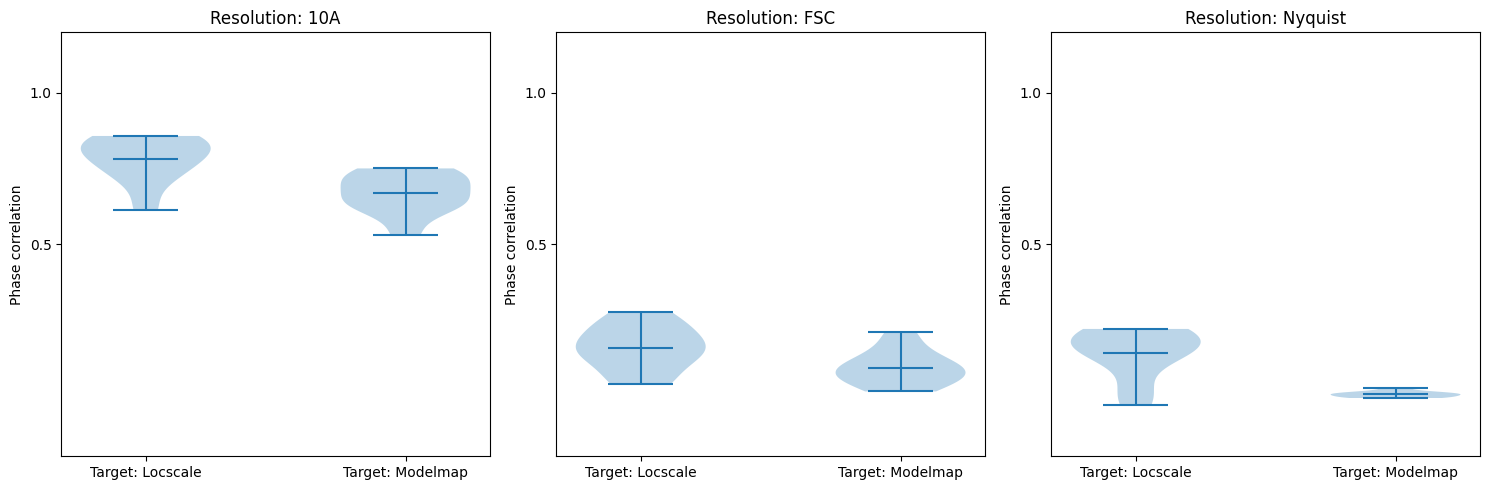

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

phase_corr_at_10A_loscale = [phase_corr_at_10A[emdb_pdb][0] for emdb_pdb in phase_corr_at_10A]
phase_corr_at_10A_modelmap = [phase_corr_at_10A[emdb_pdb][1] for emdb_pdb in phase_corr_at_10A]
phase_corr_at_fsc_loscale = [phase_corr_at_fsc[emdb_pdb][0] for emdb_pdb in phase_corr_at_fsc]
phase_corr_at_fsc_modelmap = [phase_corr_at_fsc[emdb_pdb][1] for emdb_pdb in phase_corr_at_fsc]
phase_corr_at_nyquist_loscale = [phase_corr_at_nyquist[emdb_pdb][0] for emdb_pdb in phase_corr_at_nyquist]
phase_corr_at_nyquist_modelmap = [phase_corr_at_nyquist[emdb_pdb][1] for emdb_pdb in phase_corr_at_nyquist]

ax[0].set_title('Phase correlation at 10A')
ax[0].violinplot([phase_corr_at_10A_loscale, phase_corr_at_10A_modelmap], showmeans=True)
ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(['Target: Locscale', 'Target: Modelmap'])
ax[0].set_ylabel('Phase correlation')
ax[0].set_ylim(-0.2, 1.2)
ax[0].set_yticks([0.5, 1])
ax[0].set_title('Resolution: 10A')

ax[1].set_title('Phase correlation at FSC resolution')
ax[1].violinplot([phase_corr_at_fsc_loscale, phase_corr_at_fsc_modelmap], showmeans=True)
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['Target: Locscale', 'Target: Modelmap'])
ax[1].set_ylabel('Phase correlation')
ax[1].set_ylim(-0.2, 1.2)
ax[1].set_yticks([0.5, 1])
ax[1].set_title('Resolution: FSC')

ax[2].set_title('Phase correlation at Nyquist')
ax[2].violinplot([phase_corr_at_nyquist_loscale, phase_corr_at_nyquist_modelmap], showmeans=True)
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Target: Locscale', 'Target: Modelmap'])
ax[2].set_ylabel('Phase correlation')
ax[2].set_ylim(-0.2, 1.2)
ax[2].set_yticks([0.5, 1])
ax[2].set_title('Resolution: Nyquist')

plt.tight_layout()




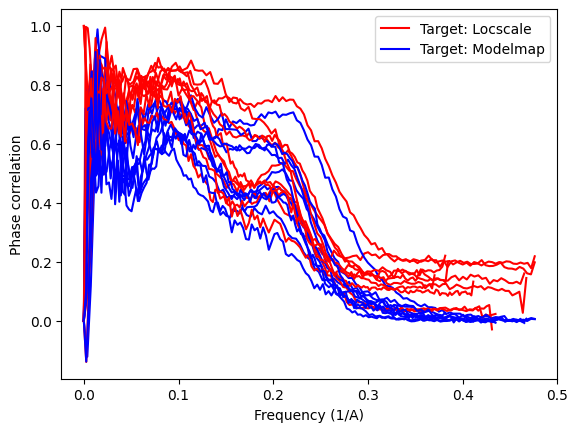

In [19]:
for emdb_pdb in input_files:
    _, apix = load_map(input_files[emdb_pdb]['unsharpened_map'])
    phase_corr_locscale = phase_correlations_locscale_target[emdb_pdb]
    phase_corr_modelmap = phase_correlations_modelmap_target[emdb_pdb]
    
    freq = frequency_array(phase_corr_locscale, apix)
    
    plt.plot(freq, phase_corr_locscale, "r-")
    plt.plot(freq, phase_corr_modelmap, "b-")

plt.xlabel("Frequency (1/A)")
plt.ylabel("Phase correlation")
plt.legend(["Target: Locscale", "Target: Modelmap"])    

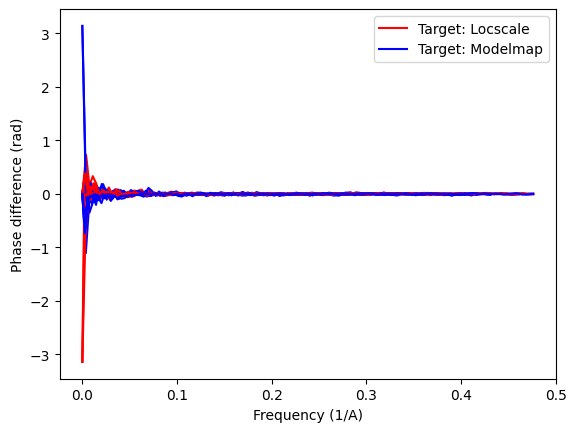

In [22]:
for emdb_pdb in input_files:
    _, apix = load_map(input_files[emdb_pdb]['unsharpened_map'])
    phase_diff_locscale = phase_difference_locscale_target[emdb_pdb]
    phase_diff_modelmap = phase_difference_modelmap_target[emdb_pdb]
    
    freq = frequency_array(phase_diff_locscale, apix)
    
    plt.plot(freq, phase_diff_locscale, "r-")
    plt.plot(freq, phase_diff_modelmap, "b-")

plt.xlabel("Frequency (1/A)")
plt.ylabel("Phase difference (rad)")
plt.legend(["Target: Locscale", "Target: Modelmap"])    

In [21]:
phase_diff_locscale.shape

(146,)